<a href="https://colab.research.google.com/github/Luminary0528/Data-Science-Practice/blob/main/EDA_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating Word Cloud in Python

Step 1: Loading the Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/IMDB-Dataset.csv', sep=',', encoding='utf-8', on_bad_lines='warn', engine='python')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


/tmp/ipython-input-3636480093.py:3: ParserWarning: Skipping line 24516: unexpected end of data

  df = pd.read_csv('/content/IMDB-Dataset.csv', sep=',', encoding='utf-8', on_bad_lines='warn', engine='python')


In [ ]:
import pandas as pd

# Try reading the CSV again, but first, let's inspect the file directly.
# This cell was previously modified to use 'engine="python"'.
# The current error 'unexpected end of data' suggests the file might be empty or corrupted.
# Let's inspect the file content with a shell command in a new cell.

In [ ]:
# Using a shell command to inspect the first 10 lines of the CSV file
!head -n 10 /content/IMDB-Dataset.csv

review,sentiment
"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

Step 2: Understanding the Dataset

Before cleaning the text let's understand the dataset. The dataset contains two columns:

review: Contains the movie review text

sentiment: It shows whether the review is positive or negative

In [ ]:
print(df.columns)
print(df['review'][0])

Index(['review', 'sentiment'], dtype='object')
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would sa

Step 3: Cleaning the Text Data

 we need to clean the text data which involves:

1. Removing punctuation

2. Converting text to lowercase

3. Removing stopwords i.e common words like "the", "is", "and"

re.sub(): This removes punctuation and numbers

STOPWORDS: These are list of common stopwords

In [ ]:
import re
from wordcloud import STOPWORDS

text = ' '.join(df['review'].astype(str).tolist())
text = re.sub(r'[^a-zA-Z\s]', '', text) # Corrected regex range
text = text.lower() # Corrected typo from loewr() to lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)

Step 4: Generating the Word Cloud

WordCloud(): Generates the word cloud

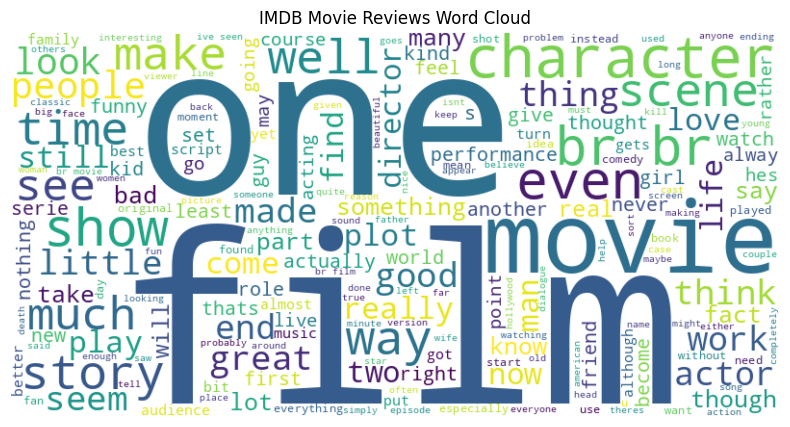

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('IMDB Movie Reviews Word Cloud')
plt.show()

Step 5: Customizing the Word Cloud


1. Maximum number of words

2. Color scheme

3. Shape of the cloud

max_words: Limits the number of words

colormap: Changes the color of the word cloud

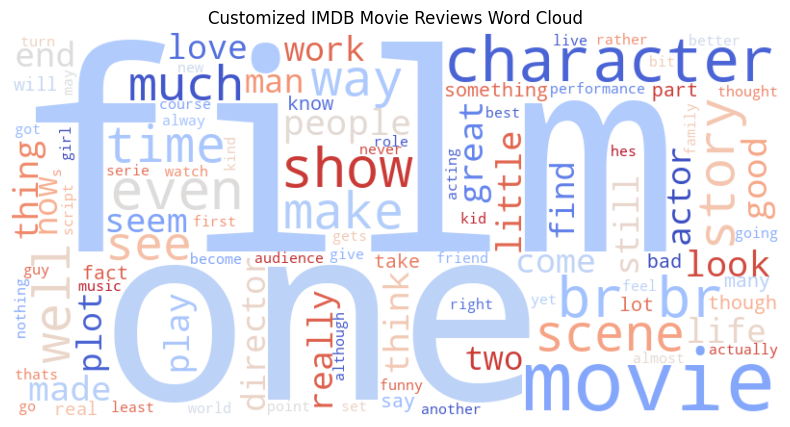

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customized IMDB Movie Reviews Word Cloud")
plt.show()

#Real life applications of Word Cloud

Sentiment Analysis:
 Imagine we have hundreds of customer reviews. By creating two word clouds one for positive words like "great" and "friendly" and another for negative words like "late" and "broken" we can easily see what customers like or dislike.

Social Media Analysis:
Observing what's trending on social media by collecting hashtags and keywords, word clouds can visually highlight what's being talked about the most.

Real-Time Data:
In live customer chats or support systems it can instantly show common issues like "delivery delay" or "payment error" which helps teams to respond faster.

**By combining word clouds with NLP techniques we can see patterns, understand customer needs and make smarter data-driven decisions.**

#**Zomato** Data Analysis Using Python

 aim to answer questions such as:

* Do more restaurants provide online delivery compared to offline services?

* Which types of restaurants are most favored by the general public?

* What price range do couples prefer for dining out?










In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("/content/Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


##Data Cleaning and Preparation

1. Convert the rate column to a float by removing denominator characters.

* dataframe['rate']=dataframe['rate'].apply(handleRate): Applies the handleRate function to clean and convert each rating value in the 'rate' column.

In [ ]:
def handleReate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleReate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Checking for missing or null values to identify any data gaps.

In [ ]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


 Exploring Restaurant Types

 1. Let's see the listed_in (type) column to identify popular restaurant categories.






Text(0.5, 0, 'Type of restaurant')

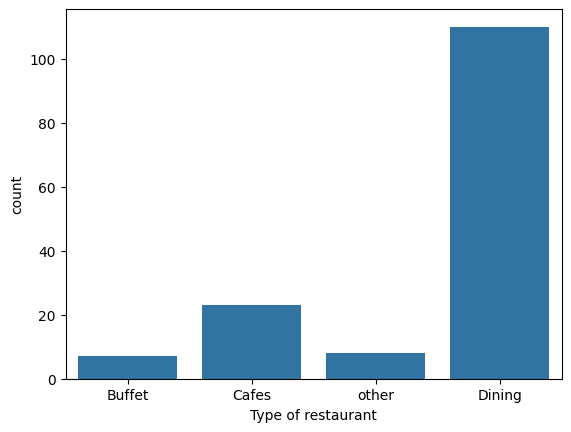

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Votes by Restaurant Type

Text(0, 0.5, 'Votes')

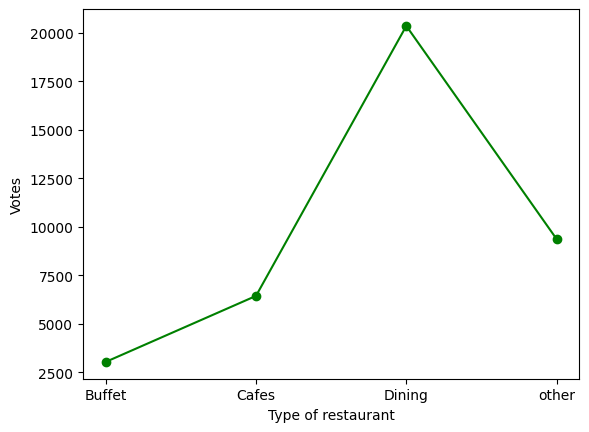

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

*Conclusion: Dining restaurants are preferred by a larger number of individuals.*

Identify the Most Voted Restaurant

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Online Order Availability

<Axes: xlabel='online_order', ylabel='count'>

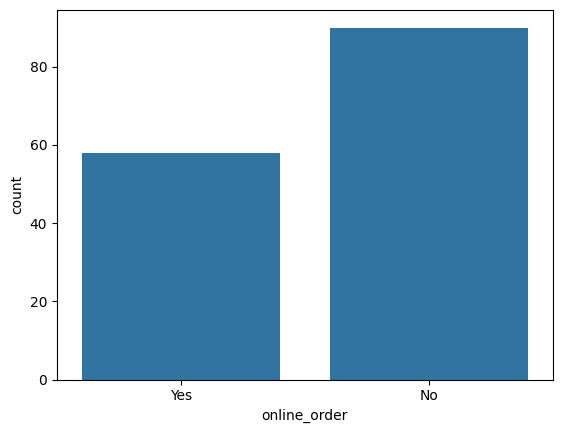

In [ ]:
sns.countplot(x=dataframe['online_order'])

*Conclusion: This suggests that a majority of the restaurants do not accept online orders.*

Analyze Ratings

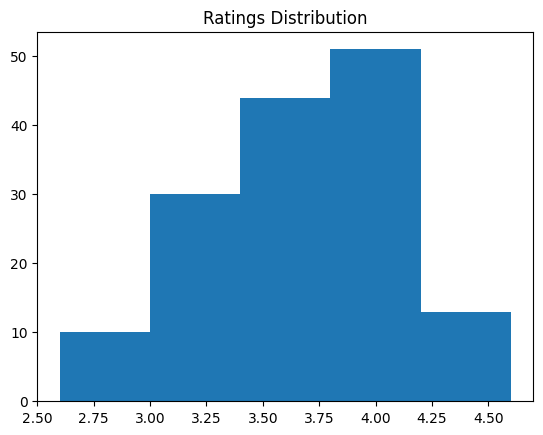

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

*Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4*

 Approximate Cost for Couples

Analyze the approx_cost(for two people) column to find the preferred price range.






<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

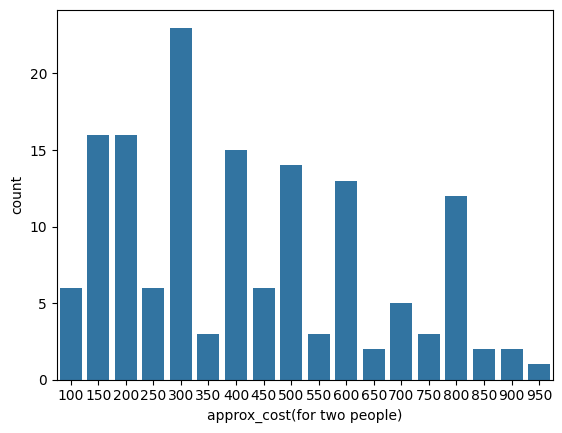

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

*Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.*

 Ratings Comparison - Online vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

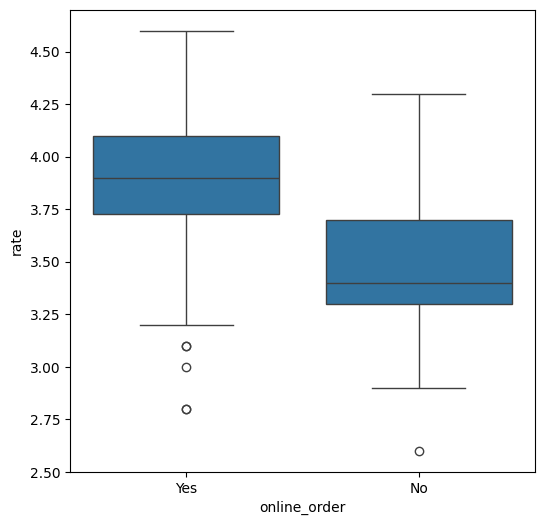

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

*Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.*

Order Mode Preferences by Restaurant Type

Find the relationship between order mode (online_order) and restaurant type (listed_in(type)).

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0): Creates a pivot table counting restaurants by type and online order availability.

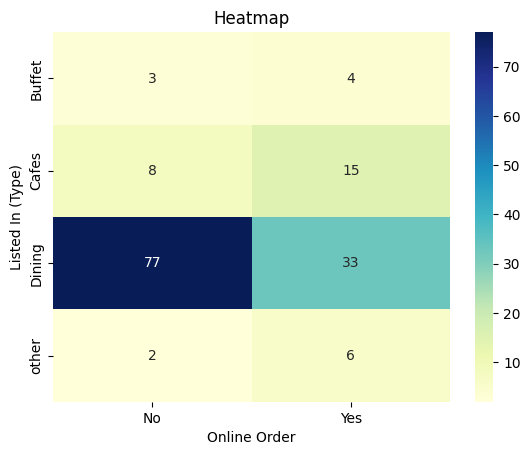

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

#EDA - UNIVARIATE

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##Categorical Data

,count
Survived,
0,266
1,152


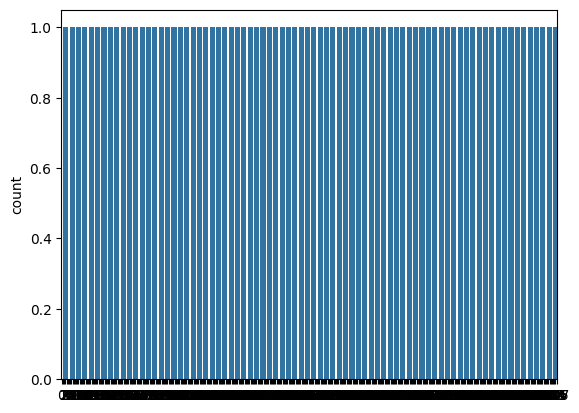

In [ ]:
sns.countplot(df['Survived'])
df['Survived'].value_counts()

<Axes: xlabel='Survived'>

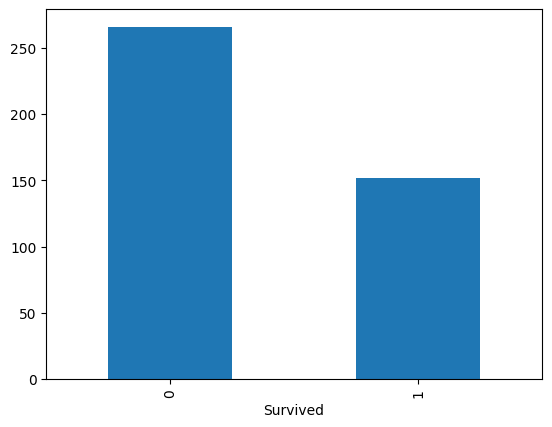

In [ ]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

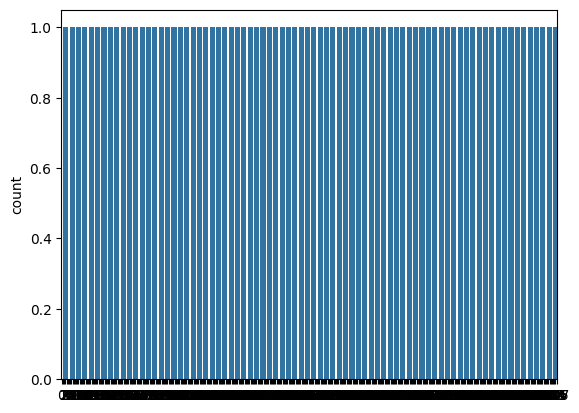

In [ ]:
sns.countplot(df['Pclass'])

<Axes: xlabel='count', ylabel='Sex'>

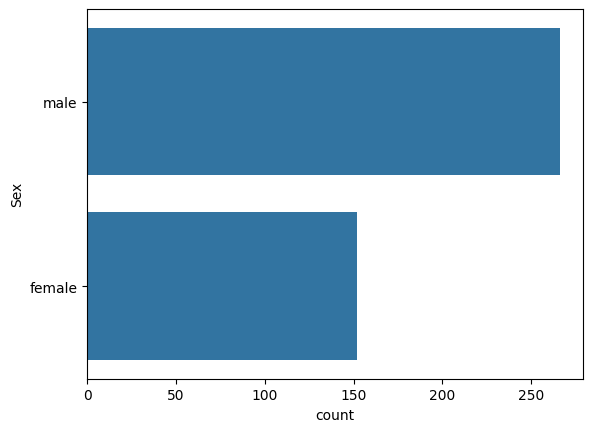

In [ ]:
sns.countplot(df['Sex'])
#

<Axes: ylabel='count'>

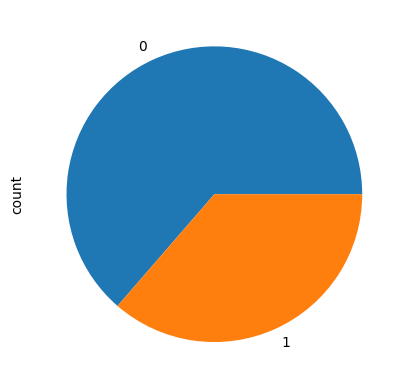

In [ ]:
df['Survived'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

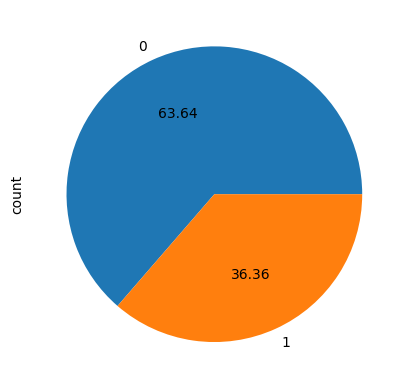

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

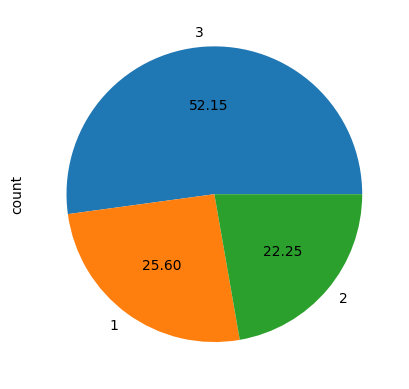

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

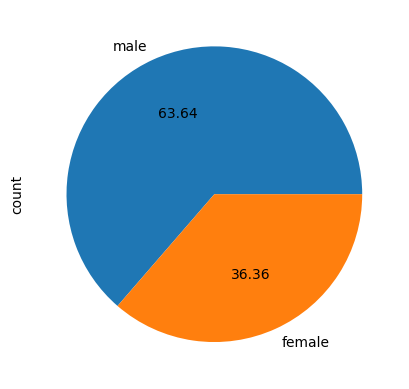

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

#numerical data


(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

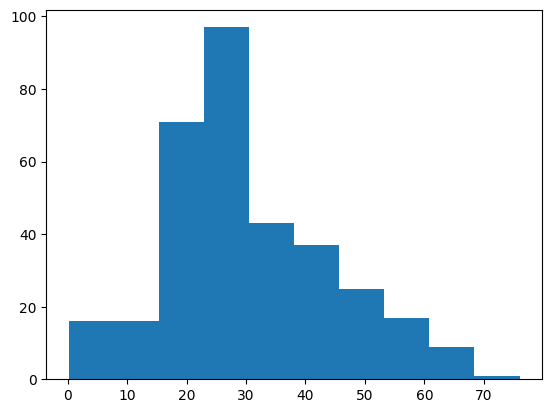

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])

/tmp/ipython-input-4179883993.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

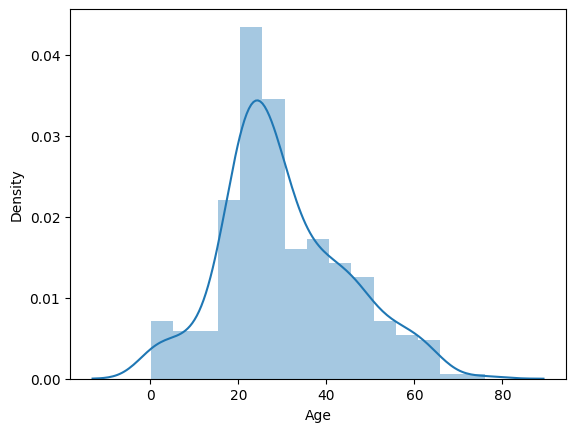

In [4]:
#Distplot

sns.distplot(df['Age'])

<Axes: ylabel='Fare'>

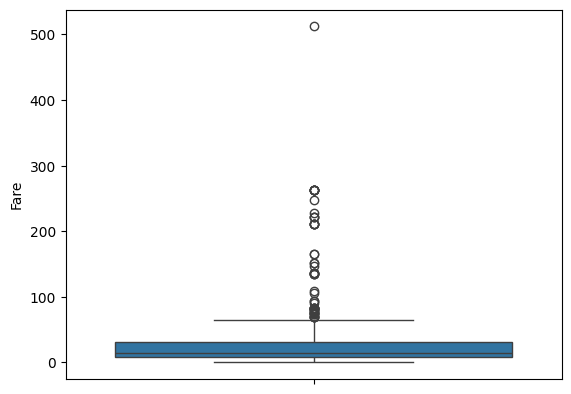

In [5]:
#Boxplot

sns.boxplot(df['Fare'])

In [6]:
df['Age'].min()

0.17

In [7]:
df['Age'].max()

76.0

In [8]:
df['Age'].skew()

np.float64(0.4573612871503845)